In [1]:
from eval import (
    compute_final_min_mae,
    compute_min_maes,
    compute_target_size,
    full_evaluation,
    get_maes,
    load_eval_data,
    median_best_mae,
    median_final_mae,
    median_steps_to_convergence,
    median_steps_to_threshold,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_problem,
    plot_best_mae_over_time,
    plot_best_return_deviation_box,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
    plot_target_beam_size_mae_correlation,
)


In [2]:
FIG_DIR = "figures/bo_vs_rl"


In [3]:
rl_sim = load_eval_data("data/bo_vs_rl/simulation/rl")
bo_sim = load_eval_data("data/bo_vs_rl/simulation/bo")

rl_real = load_eval_data("data/bo_vs_rl/real/rl")
bo_real = load_eval_data("data/bo_vs_rl/real/bo")


### Summary

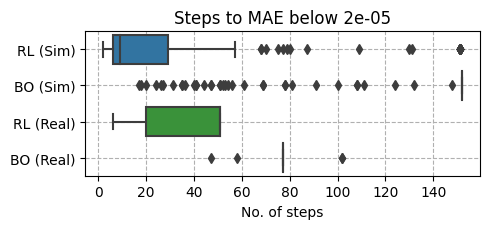

In [4]:
plot_steps_to_threshold_box(
    {
        "RL (Sim)": rl_sim,
        "BO (Sim)": bo_sim,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    save_path=f"{FIG_DIR}/steps_to_target.pdf",
)


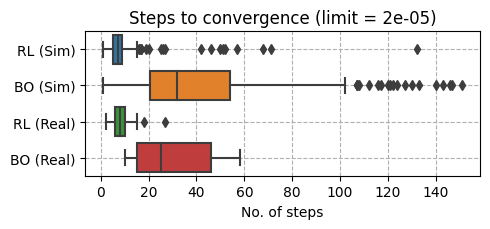

In [5]:
plot_steps_to_convergence_box(
    {
        "RL (Sim)": rl_sim,
        "BO (Sim)": bo_sim,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    save_path=f"{FIG_DIR}/steps_to_convergence.pdf",
)


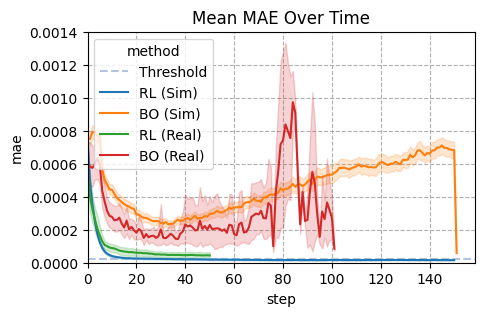

In [6]:
plot_mae_over_time(
    {
        "RL (Sim)": rl_sim,
        "BO (Sim)": bo_sim,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    threshold=20e-6,
    save_path=f"{FIG_DIR}/mae_over_time.pdf",
)


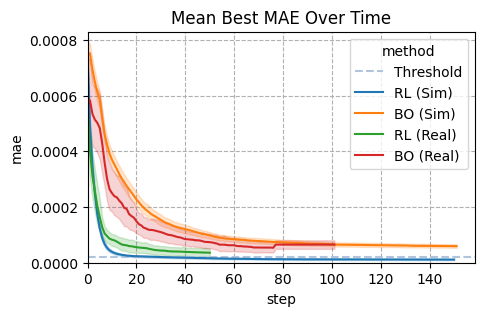

In [7]:
plot_best_mae_over_time(
    {
        "RL (Sim)": rl_sim,
        "BO (Sim)": bo_sim,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    threshold=20e-6,
    save_path=f"{FIG_DIR}/best_mae_over_time.pdf",
)


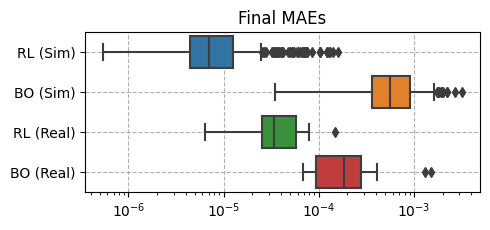

In [8]:
plot_final_mae_box(
    {
        "RL (Sim)": rl_sim,
        "BO (Sim)": bo_sim,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    save_path=f"{FIG_DIR}/final_mae.pdf",
)


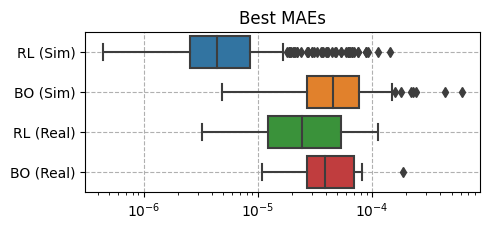

In [9]:
plot_best_mae_box(
    {
        "RL (Sim)": rl_sim,
        "BO (Sim)": bo_sim,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    save_path=f"{FIG_DIR}/final_best_mae.pdf",
)


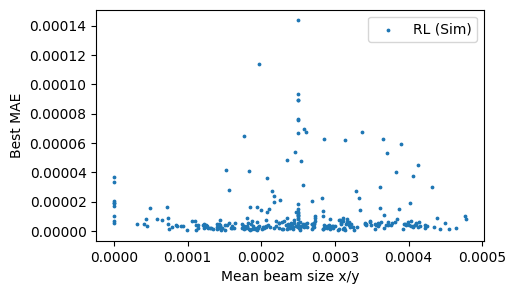

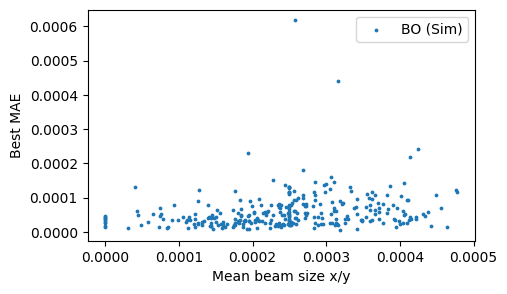

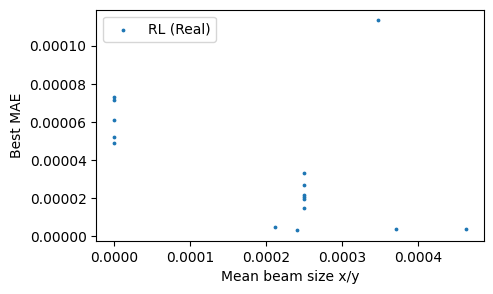

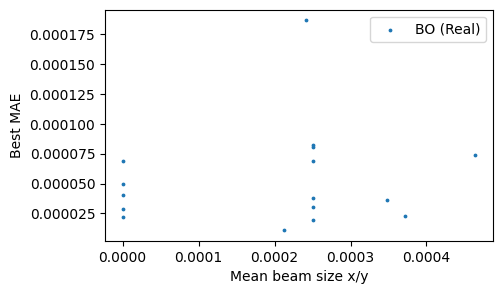

In [10]:
data = {
    "RL (Sim)": rl_sim,
    "BO (Sim)": bo_sim,
    "RL (Real)": rl_real,
    "BO (Real)": bo_real,
}


for name, results in data.items():
    plot_target_beam_size_mae_correlation(results, name=name)


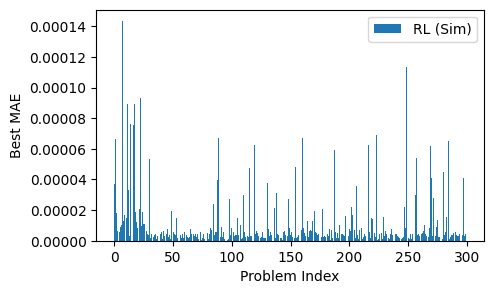

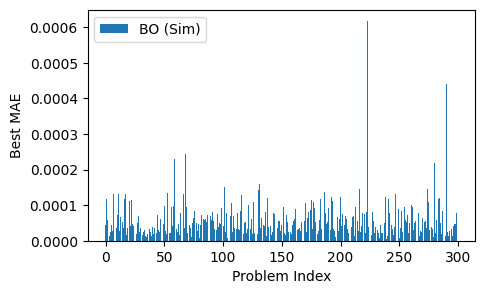

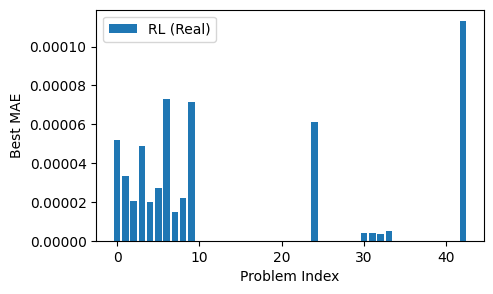

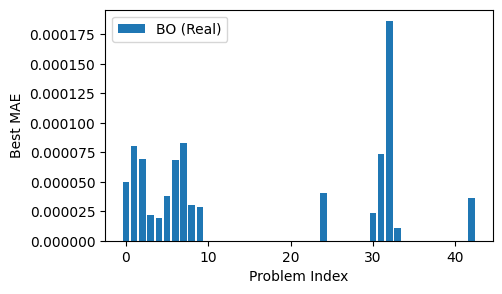

In [11]:
data = {
    "RL (Sim)": rl_sim,
    "BO (Sim)": bo_sim,
    "RL (Real)": rl_real,
    "BO (Real)": bo_real,
}

for name, results in data.items():
    plot_best_mae_over_problem(results, name=name)


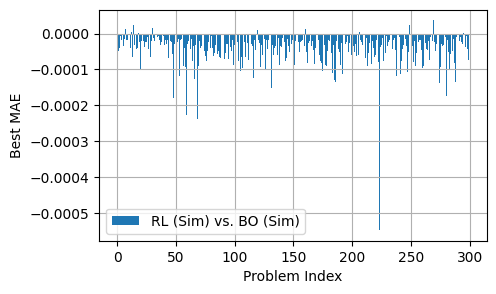

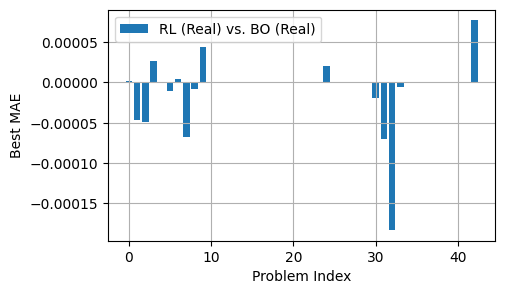

In [12]:
data = {
    "RL (Sim)": rl_sim,
    "BO (Sim)": bo_sim,
    "RL (Real)": rl_real,
    "BO (Real)": bo_real,
}

plot_best_mae_diff_over_problem(
    results_1=data["RL (Sim)"],
    name_1="RL (Sim)",
    results_2=data["BO (Sim)"],
    name_2="BO (Sim)",
)
plot_best_mae_diff_over_problem(
    results_1=data["RL (Real)"],
    name_1="RL (Real)",
    results_2=data["BO (Real)"],
    name_2="BO (Real)",
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


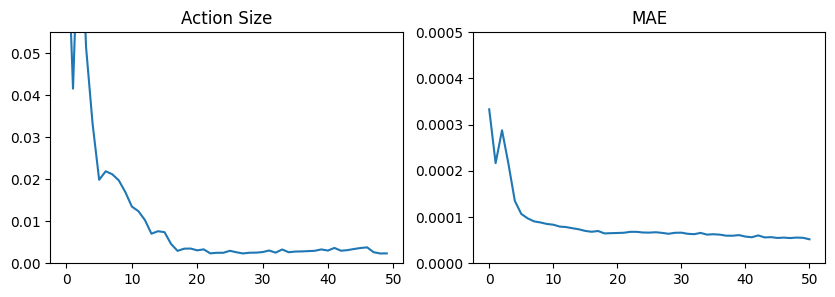

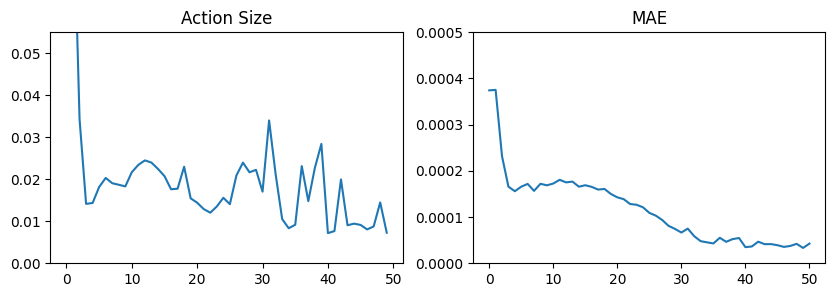

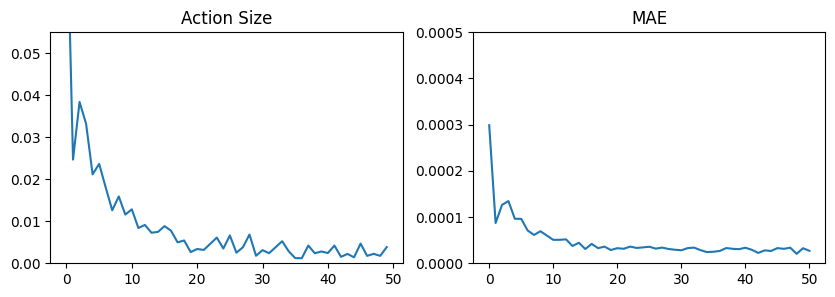

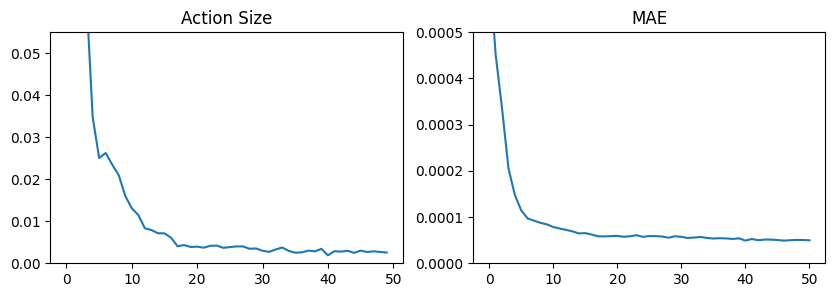

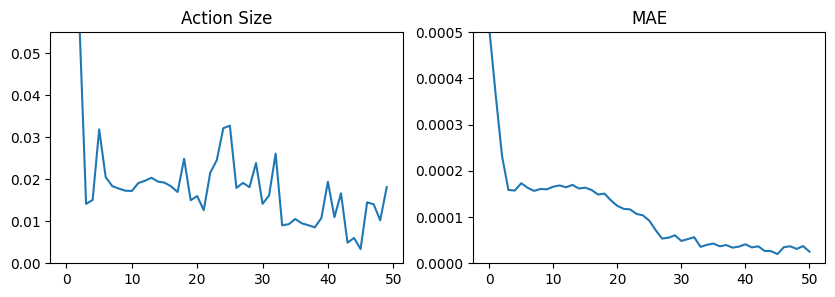

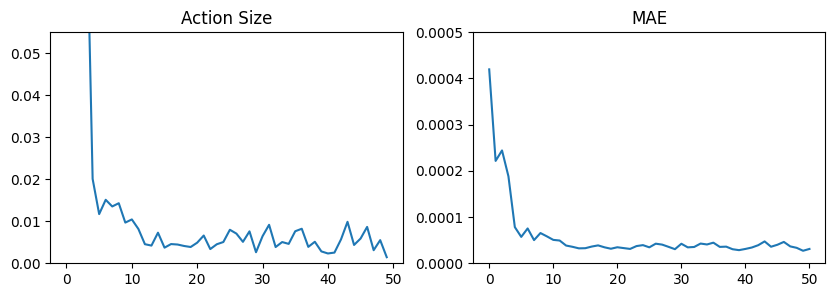

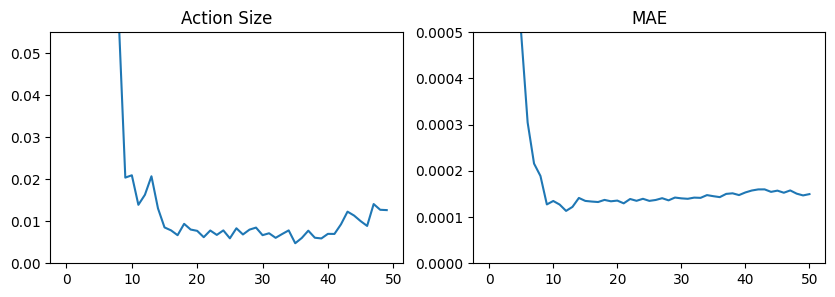

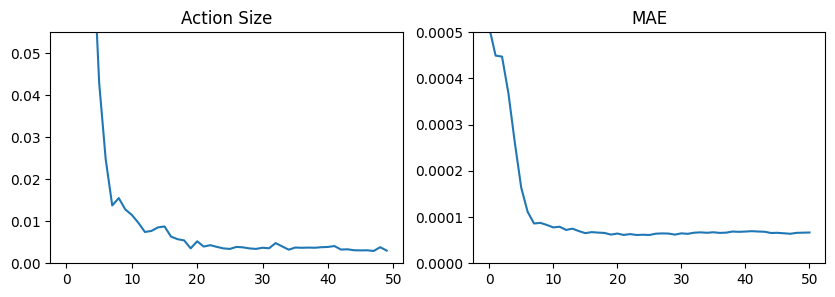

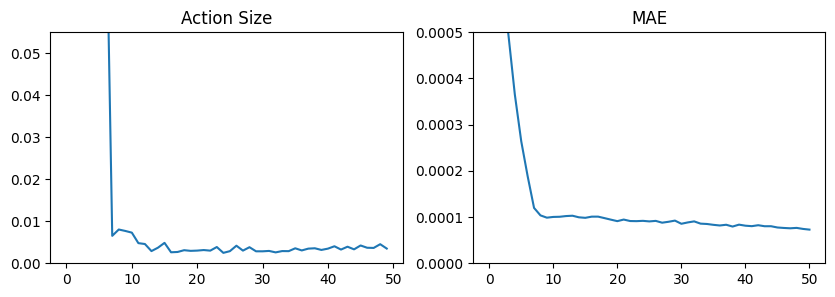

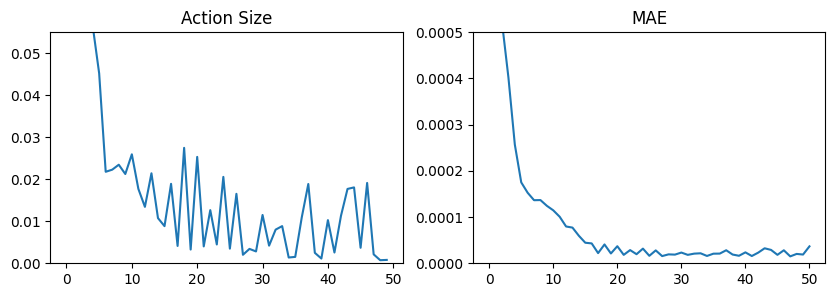

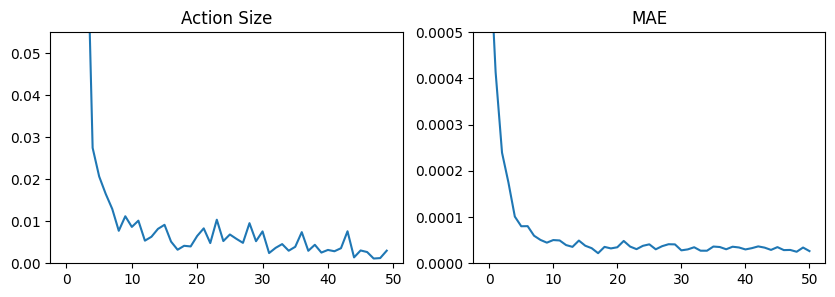

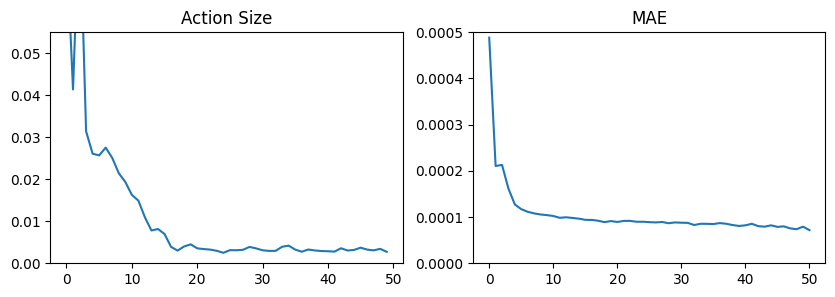

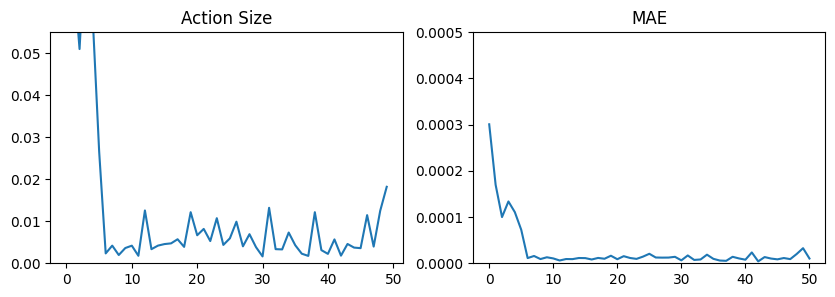

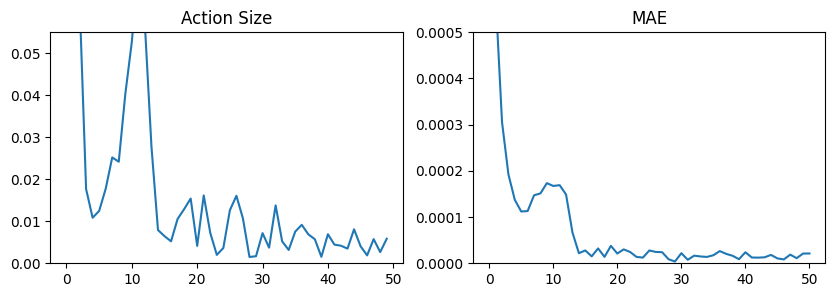

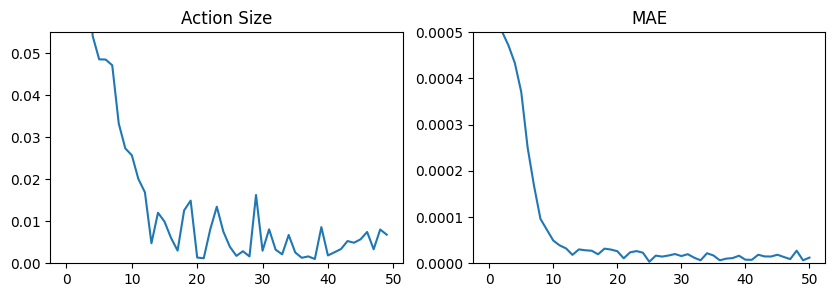

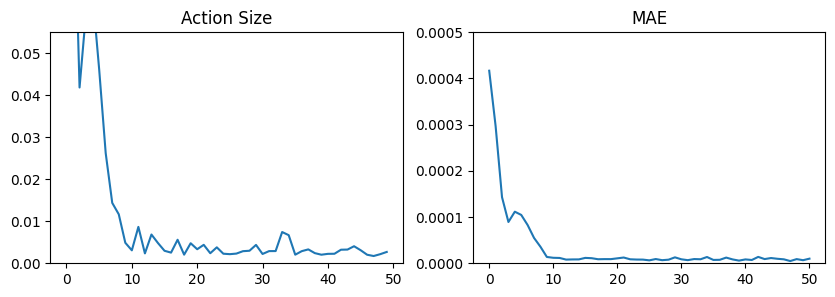

In [ ]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    action_sizes = np.max(np.abs(normalized), axis=1)

    maes = get_maes(episode)

    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.title("Action Size")
    plt.plot(action_sizes)
    plt.ylim(0, 0.055)
    plt.subplot(122)
    plt.title("MAE")
    plt.plot(maes)
    plt.ylim(0, 0.0005)
    plt.show()


In [ ]:
1, 4


(1, 4)

In [ ]:
rl_real[1]["observations"][0]["target"]


array([0.    , 0.0005, 0.    , 0.    ], dtype=float32)

In [ ]:
rl_real[4]["observations"][0]["target"]


array([-0.001 ,  0.0005,  0.    ,  0.    ], dtype=float32)

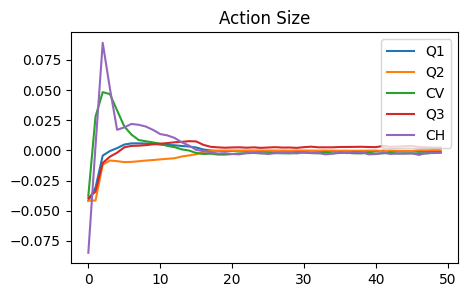

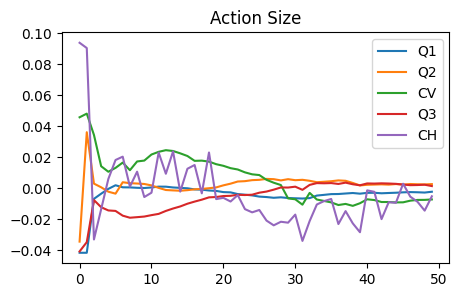

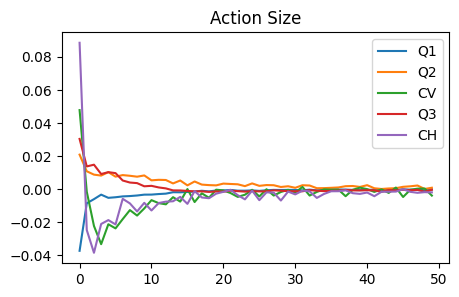

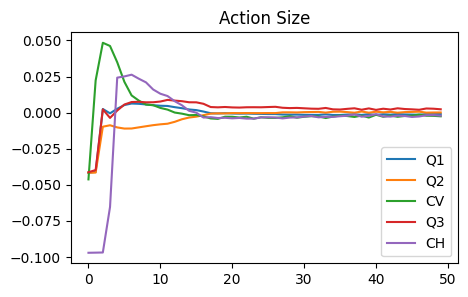

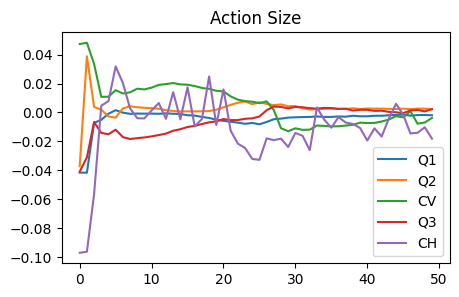

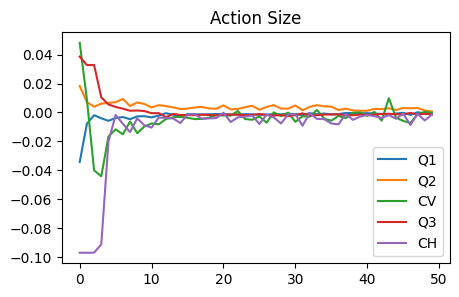

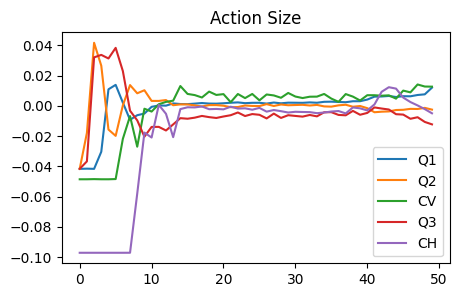

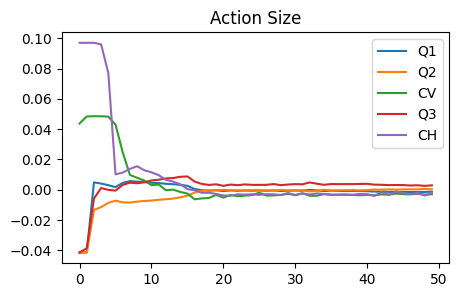

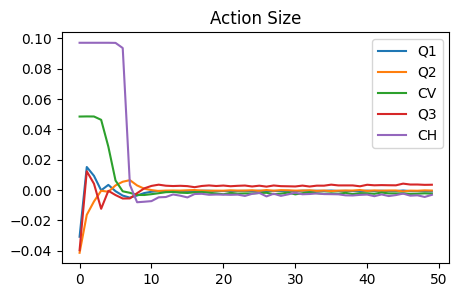

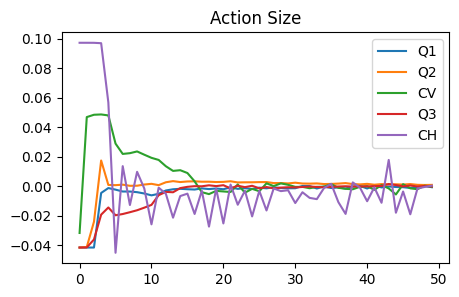

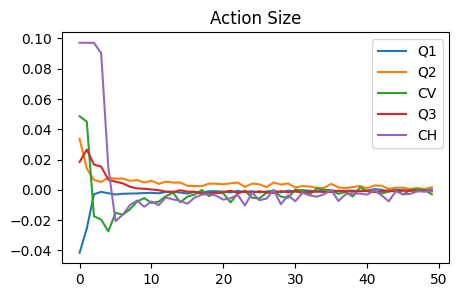

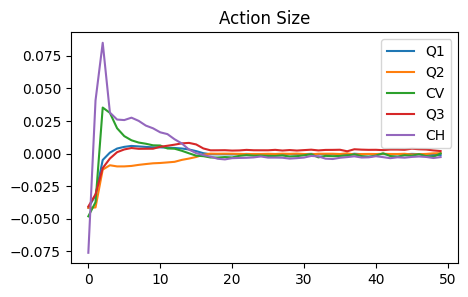

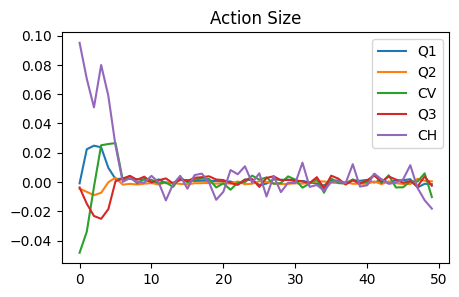

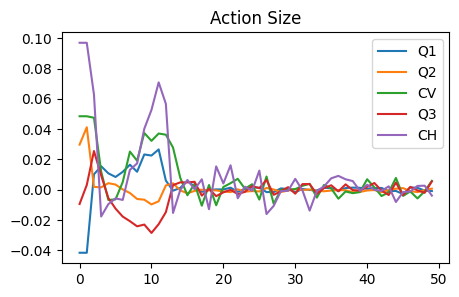

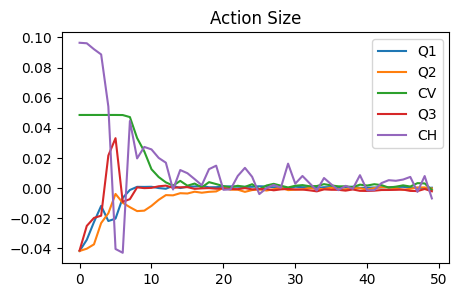

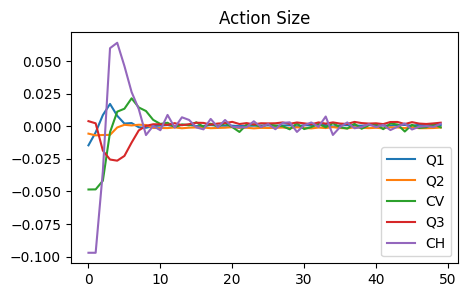

In [ ]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    normalized = normalized

    plt.figure(figsize=(5, 3))
    plt.title("Action Size")
    plt.plot(normalized[:, 0], label="Q1")
    plt.plot(normalized[:, 1], label="Q2")
    plt.plot(normalized[:, 2], label="CV")
    plt.plot(normalized[:, 3], label="Q3")
    plt.plot(normalized[:, 4], label="CH")
    plt.legend()
    plt.show()


In [ ]:
rl_real[0]["observations"][0]["beam"]


array([0.00035522, 0.00011841, 0.00010399, 0.00075537], dtype=float32)

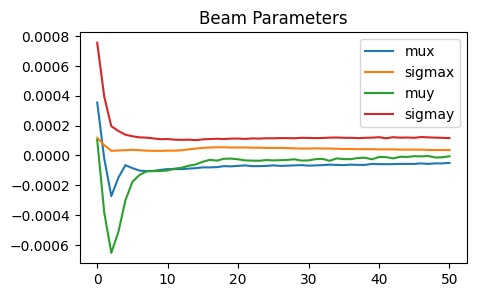

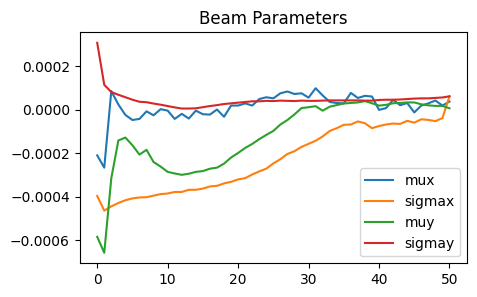

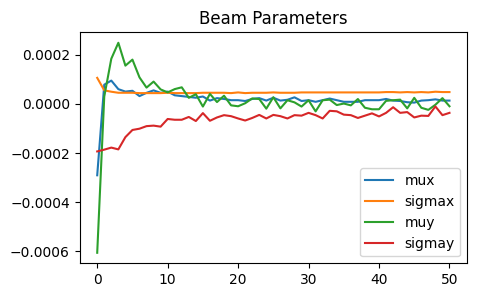

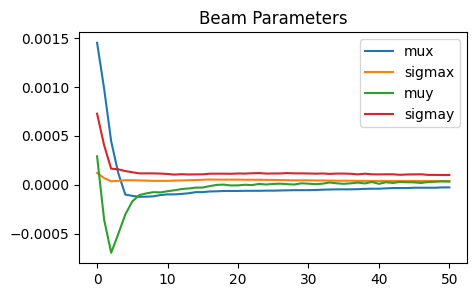

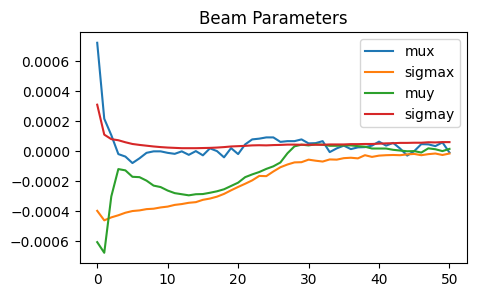

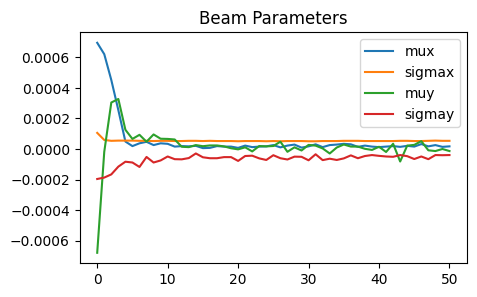

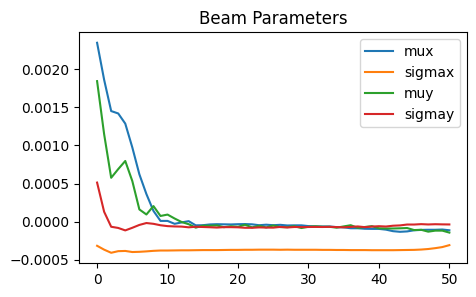

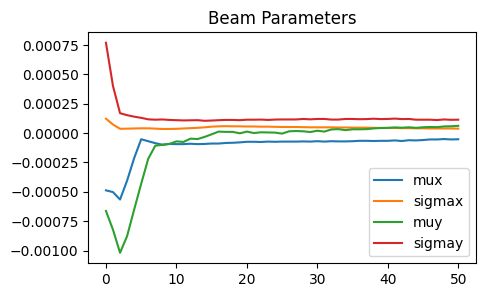

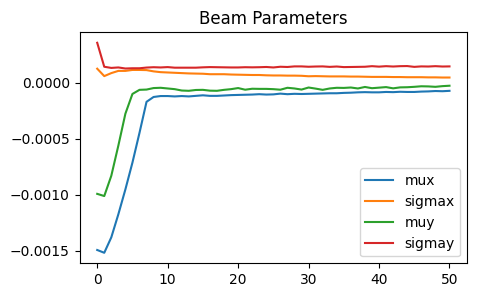

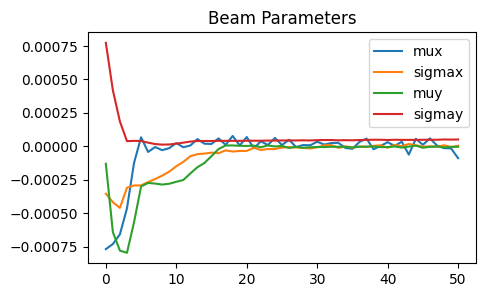

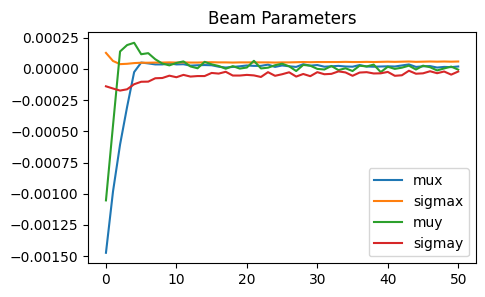

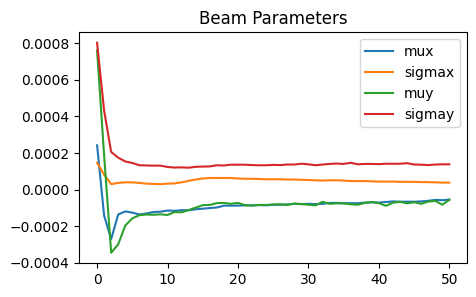

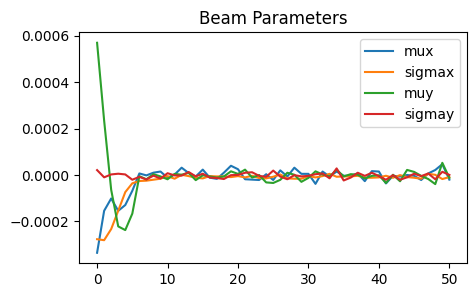

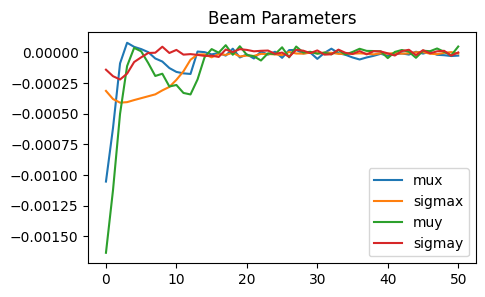

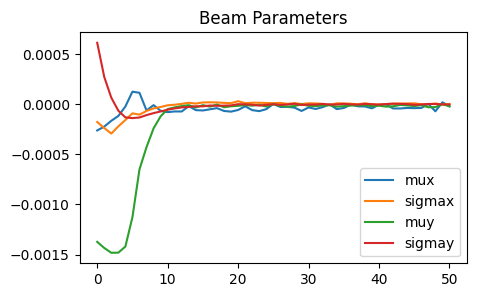

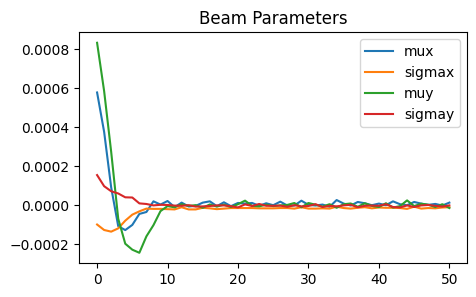

In [ ]:
for episode in rl_real:
    beams = np.stack([obs["beam"] for obs in episode["observations"]])
    targets = np.stack([obs["target"] for obs in episode["observations"]])

    diffs = beams - targets

    plt.figure(figsize=(5, 3))
    plt.title("Beam Parameters")
    plt.plot(diffs[:, 0], label="mux")
    plt.plot(diffs[:, 1], label="sigmax")
    plt.plot(diffs[:, 2], label="muy")
    plt.plot(diffs[:, 3], label="sigmay")
    plt.legend()
    plt.show()


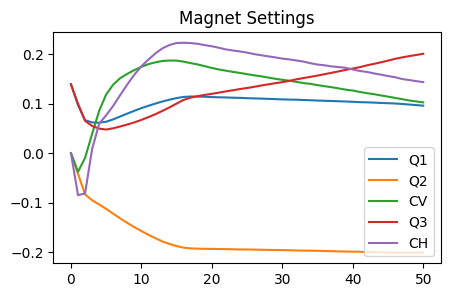

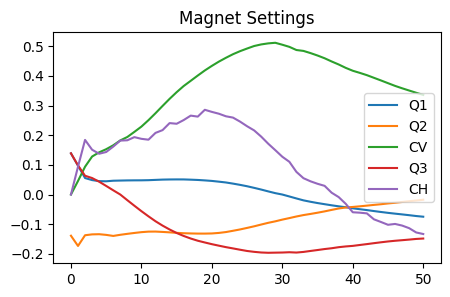

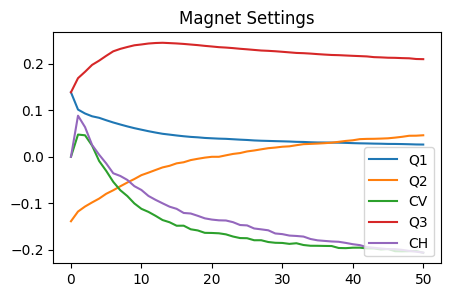

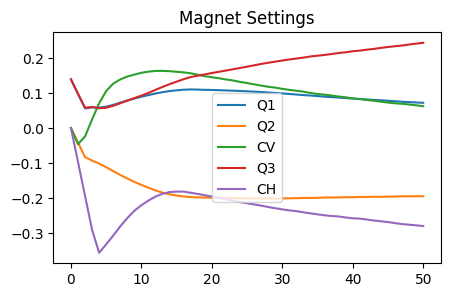

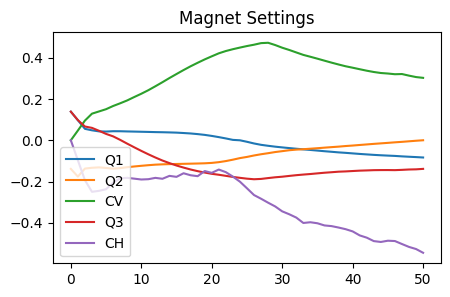

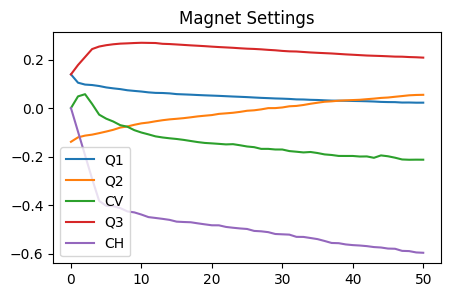

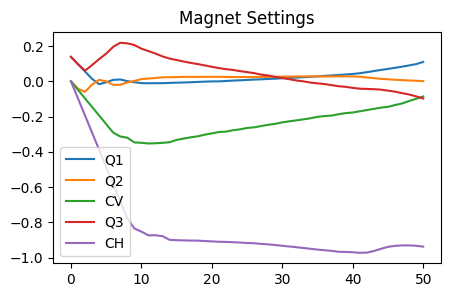

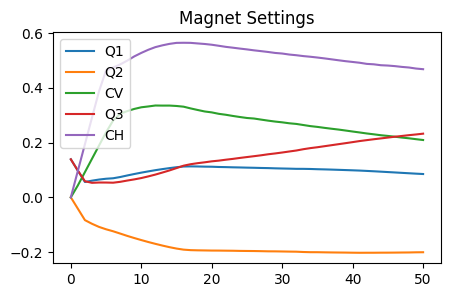

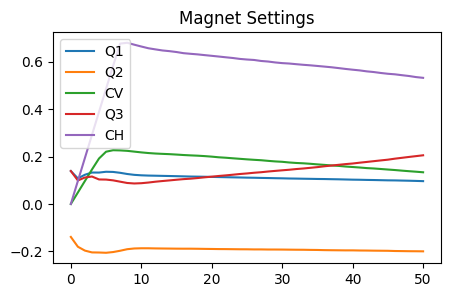

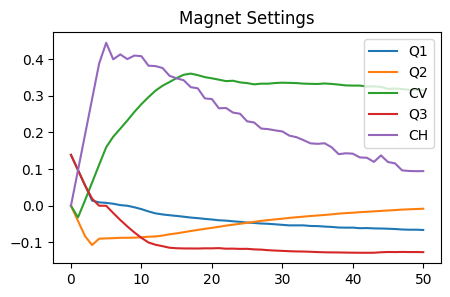

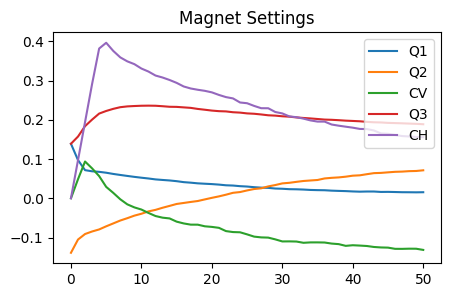

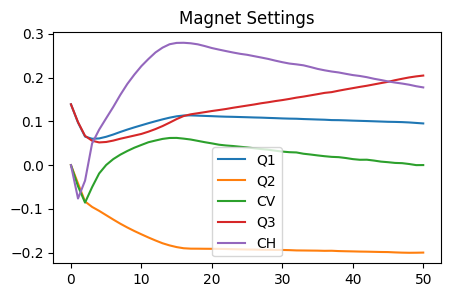

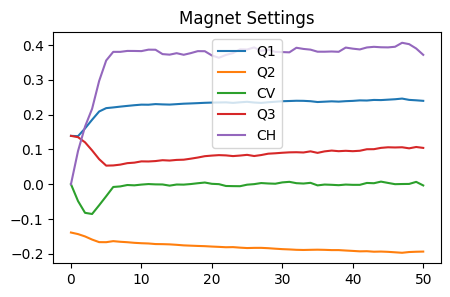

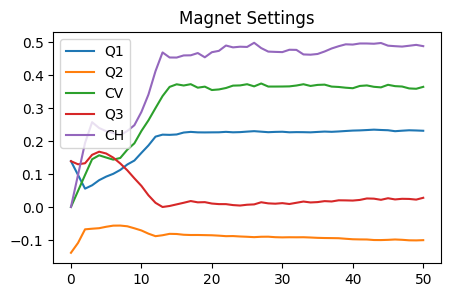

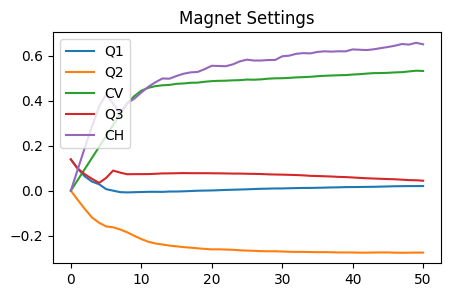

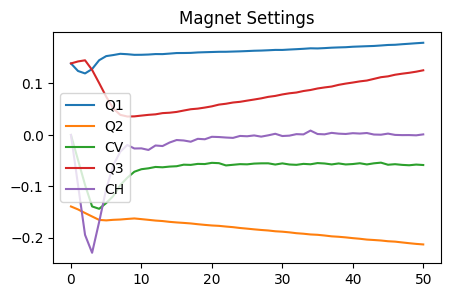

In [ ]:
for episode in rl_real:
    magnets = np.stack([obs["magnets"] for obs in episode["observations"]])
    normalized = magnets / [72, 72, 6.1782e-3, 72, 6.1782e-3]

    plt.figure(figsize=(5, 3))
    plt.title("Magnet Settings")
    plt.plot(normalized[:, 0], label="Q1")
    plt.plot(normalized[:, 1], label="Q2")
    plt.plot(normalized[:, 2], label="CV")
    plt.plot(normalized[:, 3], label="Q3")
    plt.plot(normalized[:, 4], label="CH")
    plt.legend()
    plt.show()


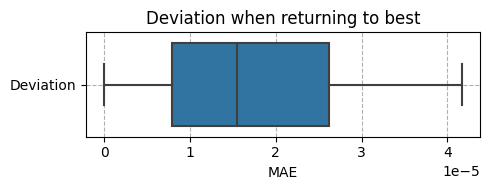

In [4]:
plot_best_return_deviation_box(bo_real)


2.278259489685297e-05


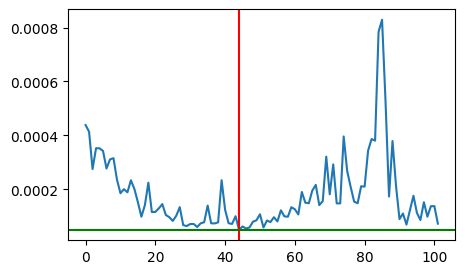

1.614642678759992e-05


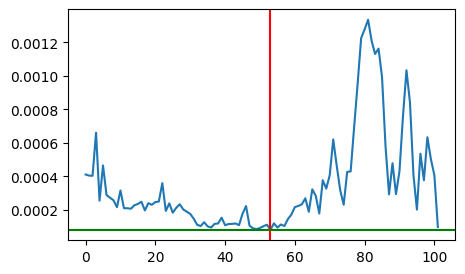

1.1036958312615752e-05


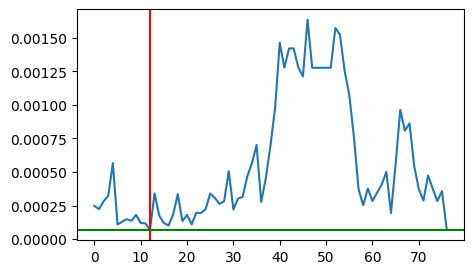

4.172931585344486e-05


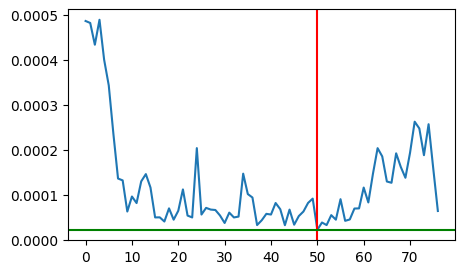

2.863457120838575e-05


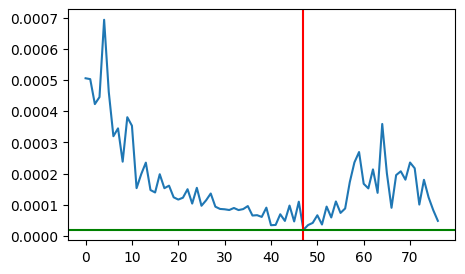

2.101667269016616e-05


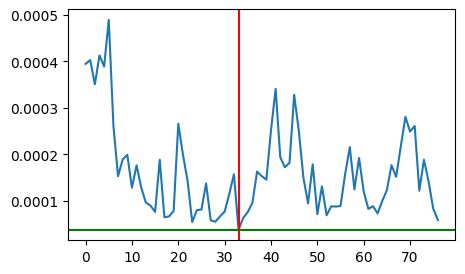

1.475865428801626e-05


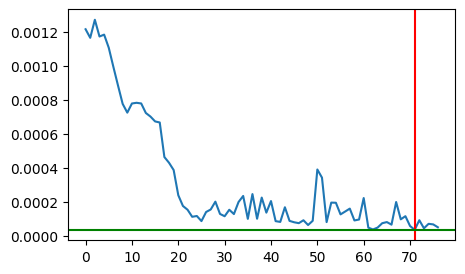

3.146382005070336e-05


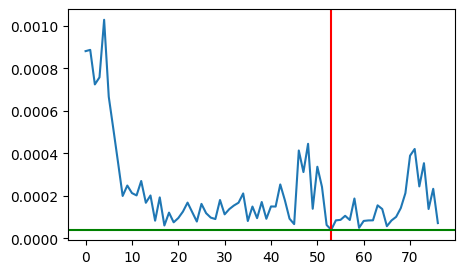

1.1165451724082232e-05


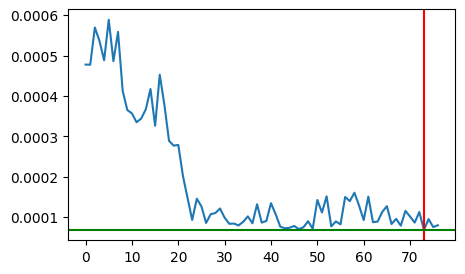

3.3410469768568873e-07


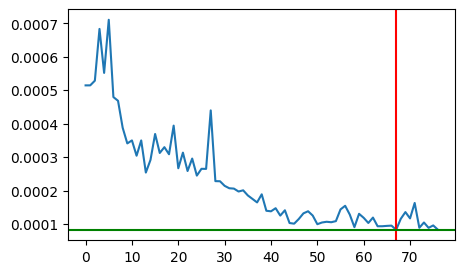

9.776720617082901e-06


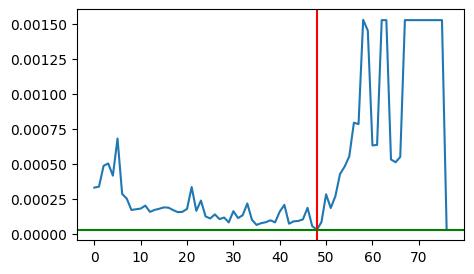

2.5363224267493933e-05


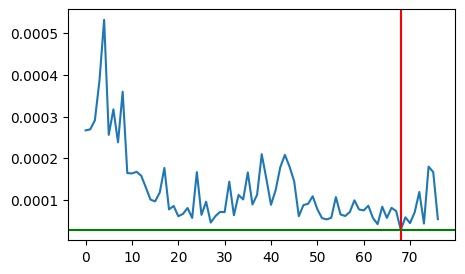

3.4895525459432974e-05


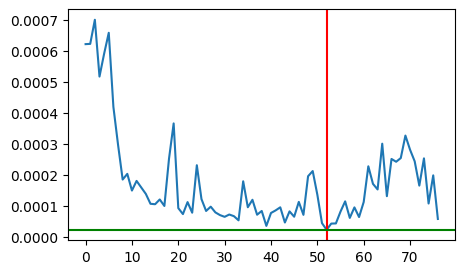

0.0


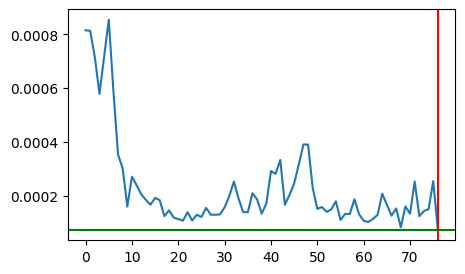

2.2641761461272836e-06


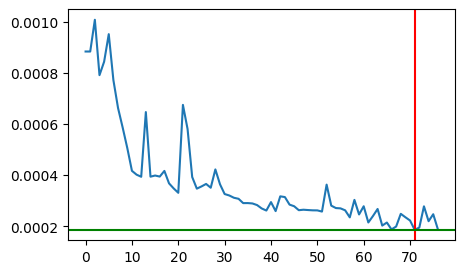

1.917782356031239e-06


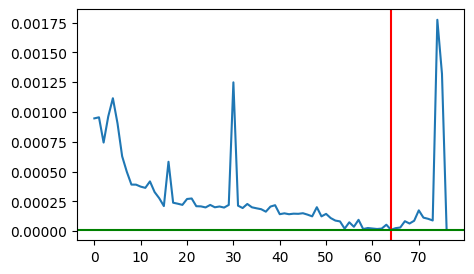

In [ ]:
for episode in bo_real:
    maes = get_maes(episode)
    first = np.argmin(maes)

    print(abs(maes[first] - maes[-1]))

    plt.figure(figsize=(5, 3))
    plt.plot(maes)
    plt.axvline(first, c="red")
    plt.axhline(maes[first], c="green")
    plt.show()
